In [8]:
import warnings
warnings.filterwarnings("ignore")
#eliminates errors in the request of updating libraries like numpy


import pandas as pd
import numpy as np
import seaborn as sns #creating visualisations
import lux
import os, sys #system related settings
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
sns.set() #Design graph bar the standards of Seaborn

df = pd.read_csv('kidney_disease.csv')



In [9]:
df.shape

(400, 26)

In [10]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputed= pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns= df.columns
df_imputed

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [13]:
df_imputed.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
#Calculating the unique values
for i in df_imputed.columns:
    print("-------------------------------------------",i,"-------------------------")
    print()
    print(set(df_imputed[i].tolist()))
    print()

------------------------------------------- id -------------------------

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 

In [15]:
print(df_imputed["rc"].mode()) #finding the mode
print(df_imputed["wc"].mode())
print(df_imputed["pcv"].mode())


0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


In [16]:
df_imputed["classification"]=df_imputed["classification"].apply(lambda x:'ckd' if x=='ckd\t' else x)


df_imputed["cad"]=df_imputed["cad"].apply(lambda x:'no' if x=='\tno' else x)

df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'no' if x=='\tno' else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x=='\tyes' else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x==' yes' else x)

df_imputed["rc"]=df_imputed["rc"].apply(lambda x:'5.2' if x=='\t?' else x)

df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t6200' else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t8400' else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t?' else x)

df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x=='\t43' else x)
df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x=='\t?' else x)


In [17]:
#Calculating the unique values
for i in df_imputed.columns:
    print("-------------------------------------------",i,"-------------------------")
    print()
    print(set(df_imputed[i].tolist()))
    print()

------------------------------------------- id -------------------------

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 

AxesSubplot(0.125,0.11;0.775x0.77)


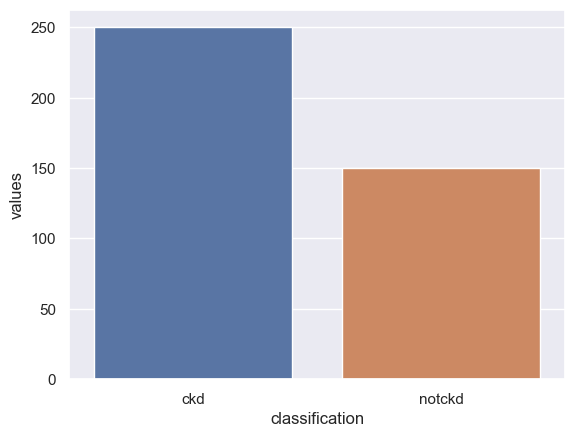

In [18]:
#check label imbalance

import matplotlib.pyplot as plt
import seaborn as sns

temp = df_imputed['classification'].value_counts()
temp_df = pd.DataFrame({'classification':temp.index,'values':temp.values})
print(sns.barplot(x='classification', y='values', data=temp_df))

In [19]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [20]:
df_imputed.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object


In [21]:
for i in df.select_dtypes(exclude=["object"]).columns:
    df_imputed[i]=df_imputed[i].apply(lambda x: float(x))

In [22]:
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


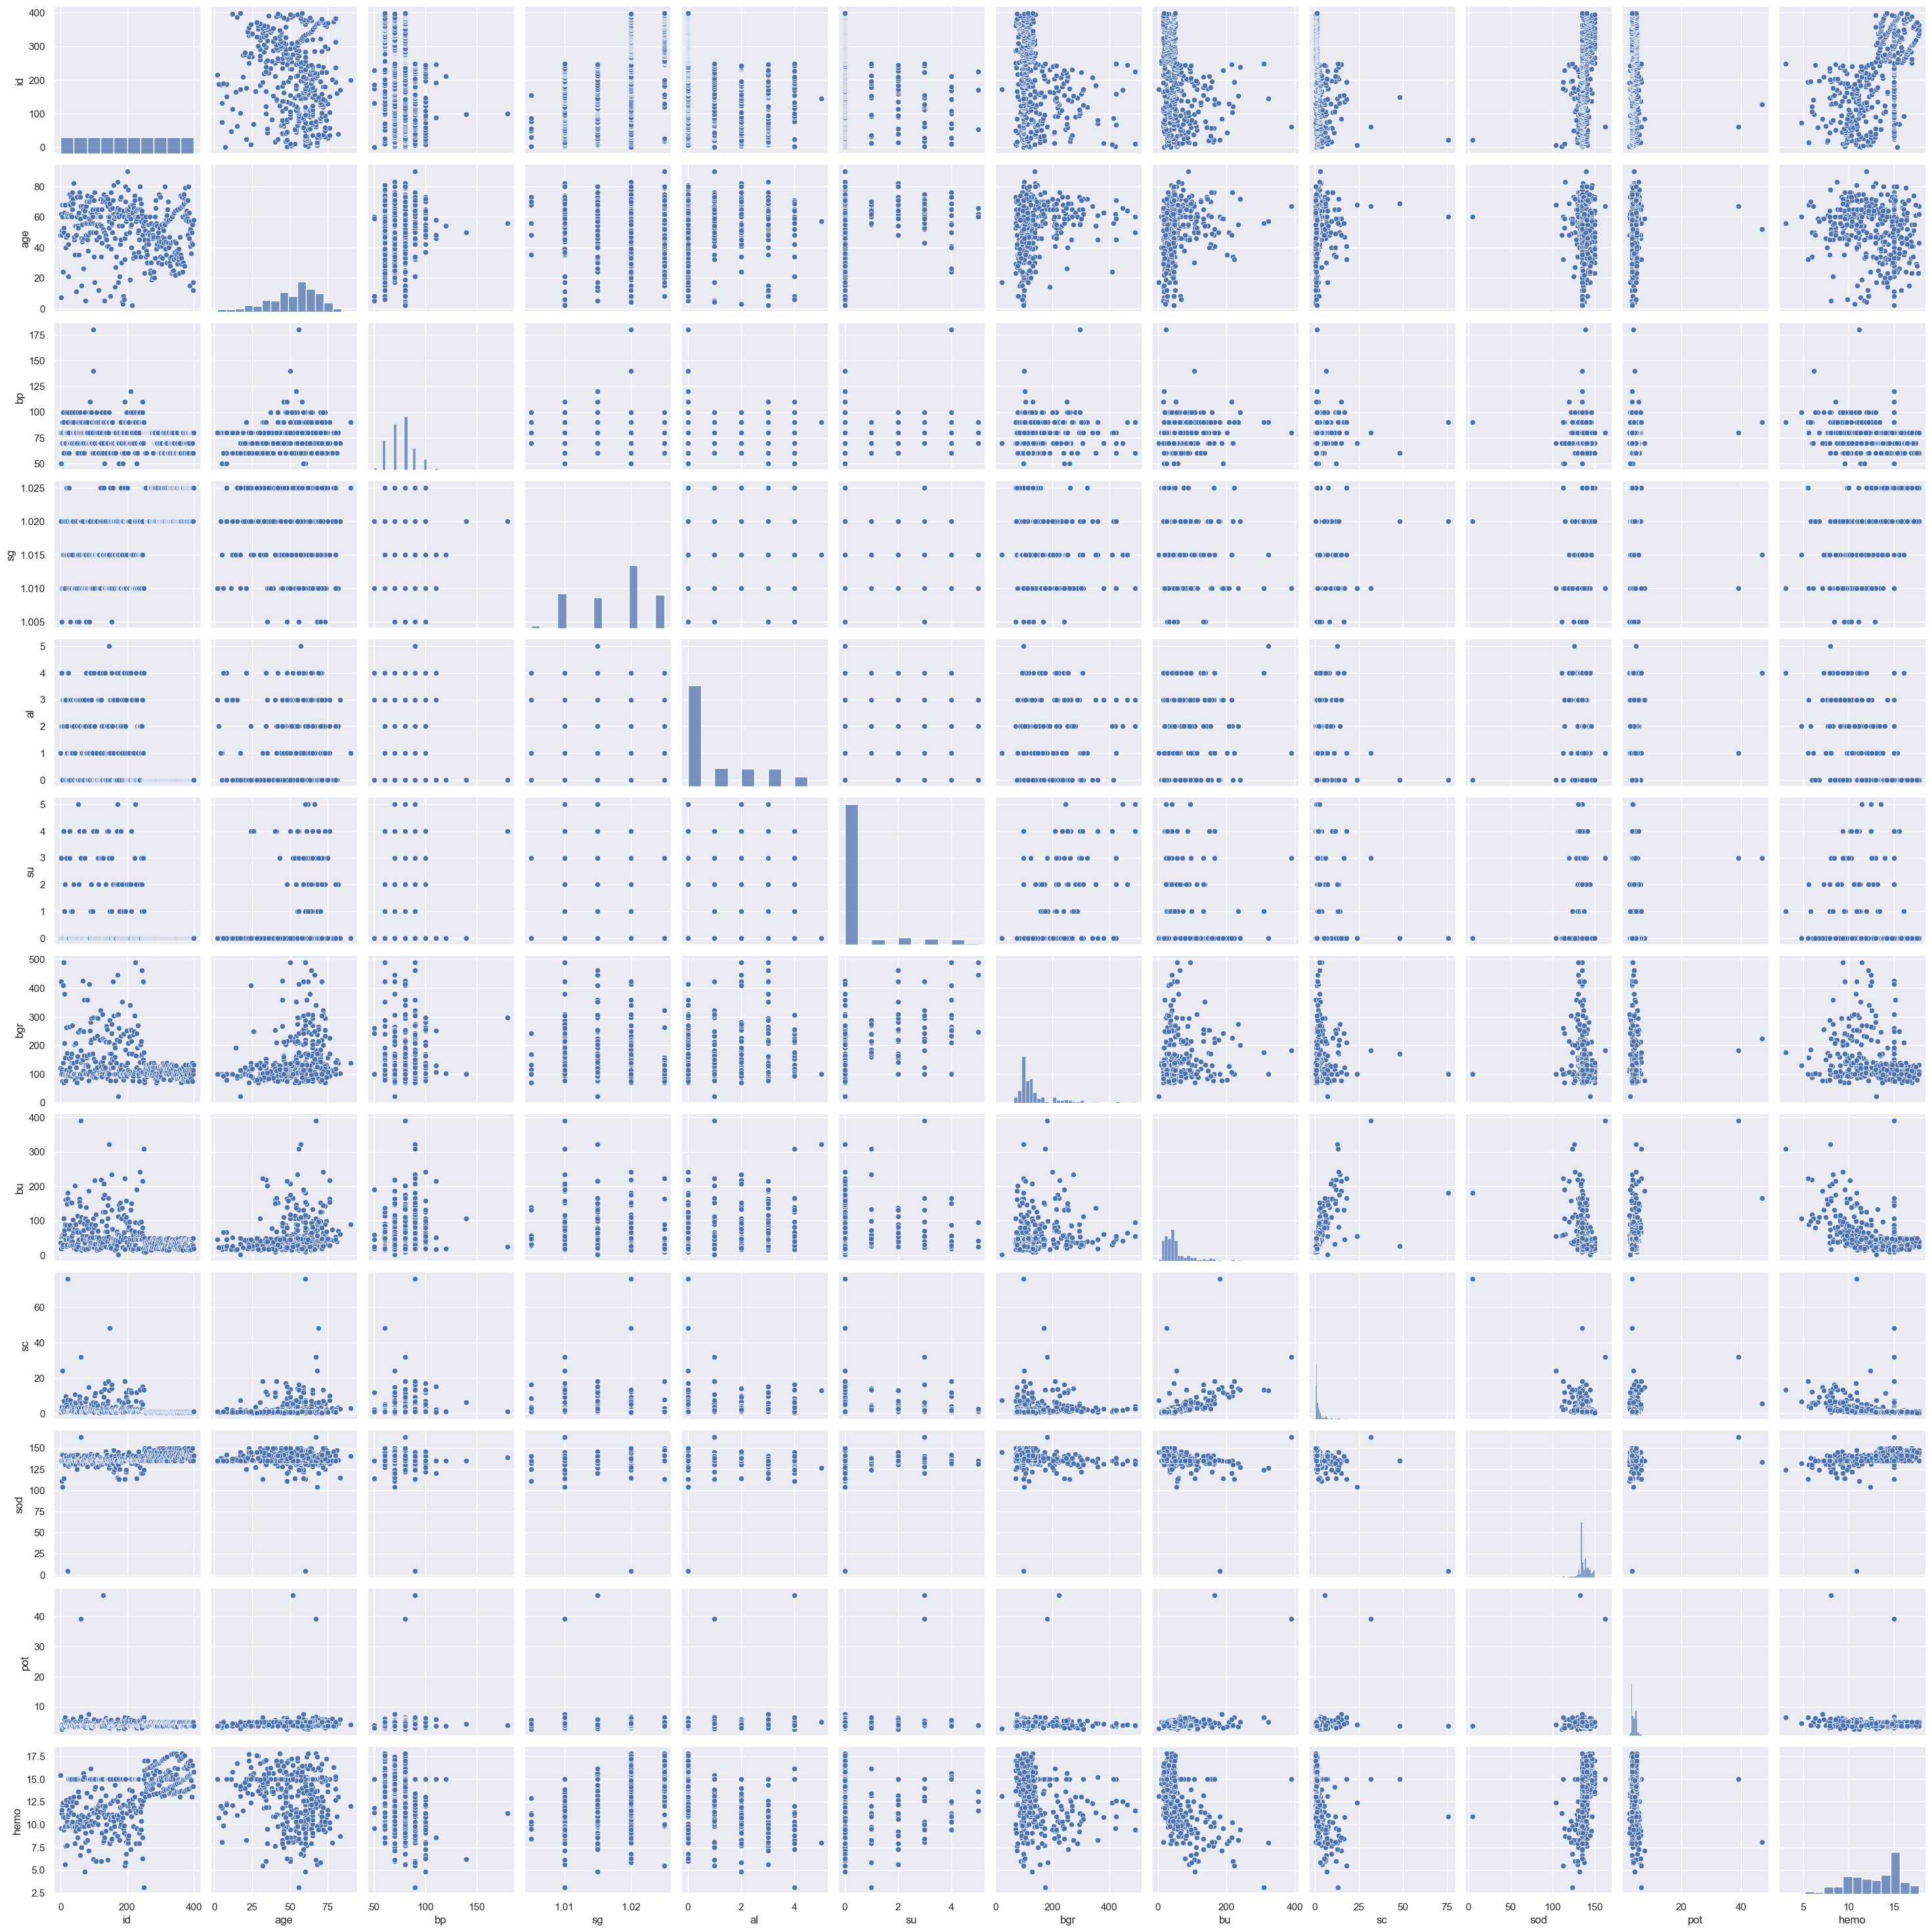

In [23]:
sns.pairplot(df_imputed)

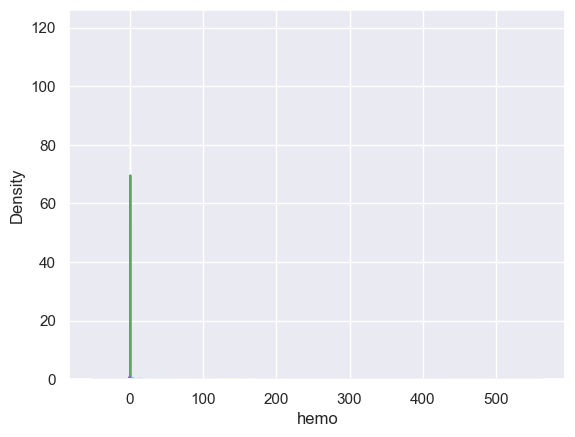

In [24]:
#distribution of data

def distplots(col):
    sns.distplot(df[col])
    plt.show
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

In [25]:
from sklearn import preprocessing

df_enco = df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [26]:
df_enco.to_csv("Kidney_Disease_Pre_Processed.csv")

PermissionError: [Errno 13] Permission denied: 'Kidney_Disease_Pre_Processed.csv'

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot= True, cmap = 'PuBuGn')

In [ ]:
df.corr()

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
df.boxplot(by ='age', column =['hemo'], grid = False)

In [ ]:
x = df.age
y = df.al
plt.scatter(x, y)
plt.xlabel("Age")
plt.ylabel("Aluminium burned");
plt.show()

In [ ]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.show()

In [ ]:
sns.pairplot(df)

In [ ]:
df.plot(kind='hist',
        alpha=0.7,
        bins=6,
        title='Histogram for independencies',
        rot=45,
        grid=True,
        figsize=(8,8),
        fontsize=15, 
        color=['#FFFF00','#7CFC00', '#FF00FF','#008080','#FF0000','#FFCF56'])
plt.xlabel('Score')
plt.ylabel("Number for  Text");


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as linear_model
import sklearn.metrics as metrics

from numpy.random import default_rng
rng = default_rng(42)
# feature range
xmin = 0
xmax = 1

# true coefficients: y = a * x + b
a = 0.5
b = 1

# parameters of data set
n = 9 # characters features ued
noise_level = 0.05
outlier_rate = 0.10
outlier_noise_level = 1
#To simulate data with outliers we take exact data, add some Gaussian noise, and then randomly select several data points. #The selected data points are moved upwards by some random distance.

# simulate data without outliers
X = (xmax - xmin) * rng.random((n, 1)) + xmin
y = (a * X + b).reshape(-1) + noise_level * rng.standard_normal(n)

# add some outliers
outlier_mask = rng.choice([True, False], size=y.size, p=[outlier_rate, 1 - outlier_rate])
inlier_mask = np.logical_not(outlier_mask)
y[outlier_mask] = (a * X[outlier_mask, 0] + b).reshape(-1) \
                  + outlier_noise_level * rng.random(np.count_nonzero(outlier_mask))

# plot data
fig, ax = plt.subplots()
ax.plot(X.reshape(-1), y, 'or', markersize=3)
plt.title('Outliers for features', fontsize = 20) # title with fontsize 20
plt.show()



In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# random data or other data sources
np.random.seed(1234)
observations = 45
timestep = np.arange(0, observations/10, 0.1)
dates = pd.date_range('1/3/2022', periods=observations)
val1 = np.sin(timestep)
val2=val1+np.random.uniform(low=-1, high=1, size=observations)#.tolist()

# organize data in a pandas dataframe
df= pd.DataFrame({'Timestep':timestep, 'Date':dates,
                               'Value_1':val1,
                               'Value_2':val2})

# Main plotly figure structure
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Value_2'],
                            marker_color='black',
                            opacity=0.6,
                            name='Value 1')])

# One of many possible additions
fig.add_traces([go.Scatter(x=df['Date'], y=df['Value_1'],
                           marker_color='blue',
                           name='Value 2')])

# plot figure

fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# random data or other data sources
np.random.seed(1234)
observations = 45
timestep = np.arange(0, observations/10, 0.1)
dates = pd.date_range('1/3/2022', periods=observations)
val1 = np.sin(timestep)
val2=val1+np.random.uniform(low=-1, high=1, size=observations)#.tolist()

# organize data in a pandas dataframe
df= pd.DataFrame({'Timestep':timestep, 'Date':dates,
                               'Value_1':val1,
                               'Value_2':val2})

# Main plotly figure structure
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Value_2'],
                            marker_color='black',
                            opacity=0.6,
                            name='Value 1')])

# One of many possible additions
fig.add_traces([go.Scatter(x=df['Date'], y=df['Value_1'],
                           marker_color='blue',
                           name='Value 2')])

# plot figure

fig.show()

#time and space


In [30]:

x = df_enco.drop(["id", "classification"], axis=1)
y = df_enco["classification"]

In [29]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))


NameError: name 'y' is not defined

In [ ]:
ros= RandomOverSampler()

x_ros, y_ros = ros.fit_resample(x,y)
print(Counter(y_ros))


In [ ]:
scaler = MiniMaxScaler({-1,1})
x=scaler.fit_transform(x_ros)
y=(y_ros)

In [ ]:
import plotly.offline as py
py.init_notebook_mode(conneccted=True)
import plotly.graph_objs as go
import plotly .tools as tls
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA = pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

In [ ]:
from sklearn.model_selection import train_text_split

x_train,x_test,y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=6) 


In [ ]:
import keras

from keras.models import Sequential, Model
#Sequential enables connectivity between layers
from keras.layers import Dense
#Layer
from Keras.layers import Dropout #Random setting of input units to Zero
from keras.optimizers import Adam #Change attributes of the Neural function


In [ ]:
def model():
    
    classifier = Sequential()
    classifier.add(Dense(15, input_shape = (x_train.shape[1],), activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(15, activation = 'relu'))
    classifier.add(Dropout(0.4))
    classifier.add(Dense(15, activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss= 'binary_crossentyopy', metrics = ['accuracy'])
    
    return classifier

In [ ]:
(x_train.shape[1]+1)*15

In [ ]:
model = model()
model.summary 


In [ ]:
history = model.fit(x_train, y_train , validation_data =(x_test, y_test), epochs=20, verbose=1)

In [ ]:
#Evaluation of the model. This is to be done manually.

from sklearn.metrics import roc_curve, confusion_matrix, classififcation_report, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve, f1_score

